In [36]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


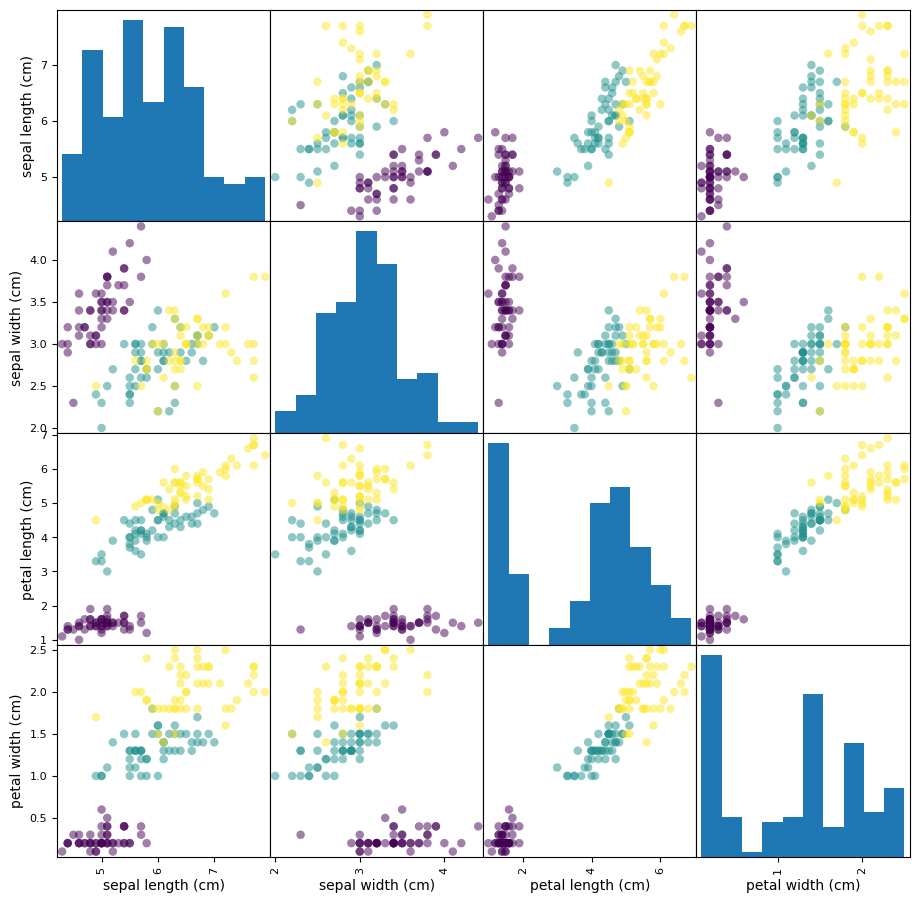

In [39]:
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=[11, 11], s=150)
plt.show()


<h1KNN : K-Nearest Neighbors/>

<h1 KNN : K-Nearest Neighbors/>

<h1>KNN : K-Nearest Neighbors</h1>

In [41]:
from sklearn import datasets
iris = datasets.load_iris()



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski',p=2)
x = iris.data
y = iris.target
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

<h1  Predict />

<h1>Predict</h1>

In [48]:
xx = np.array([[1, 1, 1, 6]])
yy = knn.predict(xx)
print(yy)

[1]


<h1>Train and test</h1>

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=
0.3, random_state=42, stratify=iris.target)

In [55]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

In [58]:
knn.score(x_test, y_test)

0.9555555555555556

<h1>Feature Extarction</h1>

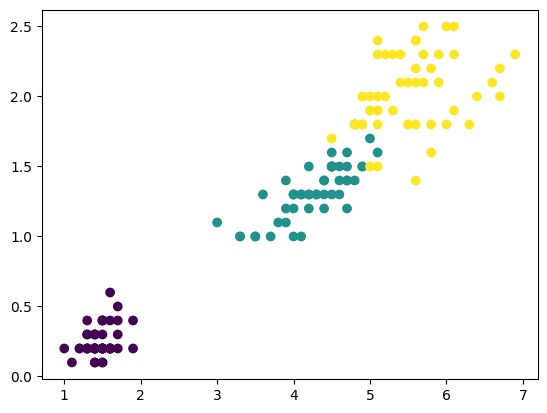

(150, 4)

In [59]:
x2 = iris.data[:, [2, 3]] #only use petal length and width
y2 = iris.target
plt.scatter(x2[:,0],x2[:,1], c=y2)
plt.show()
x.shape

In [69]:
x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [0,2,3]], iris.target, test_size=
0.3, random_state=42, stratify=iris.target)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9777777777777777

<h1>Cross Validation</h1>

In [73]:
from sklearn.model_selection import cross_val_score
x=iris.data[:, :]
y=iris.target
knn= knn.fit(x, y)
cv_scores = cross_val_score(knn, x, y, cv=10)
np.mean(cv_scores)

0.9666666666666668

<h1>Over Fitting and Under Fitting</h1>

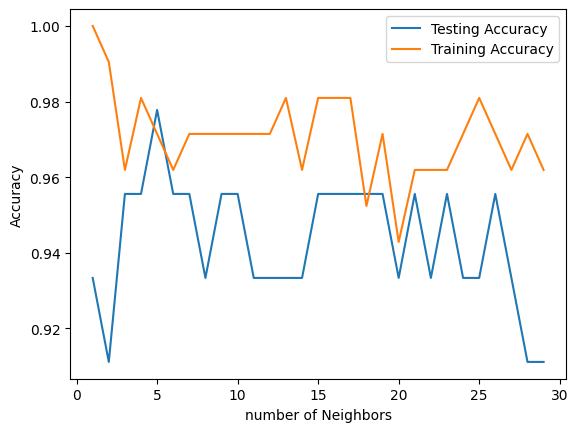

In [34]:
x_train, x_test, y_train, y_test = train_test_split(iris.data[:, :], iris.target, test_size=
0.3, random_state=42, stratify=iris.target)
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<h1>Confusion matrix</h1>

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [0,1,2,3]], iris.target, test_size=
0.3, random_state=42, stratify=iris.target)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

